<a href="https://colab.research.google.com/github/sabililrosyad12/PEMOGRAMAN_KOMPUTER-/blob/main/Muhammad_Sabilil_Rosyad_21110120140060_Tugas_Pemrograman_Komputer_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GEOSPATIAL DATA**




---
**Restaurants in Paris**

   `#Import pandas and matplotlib`

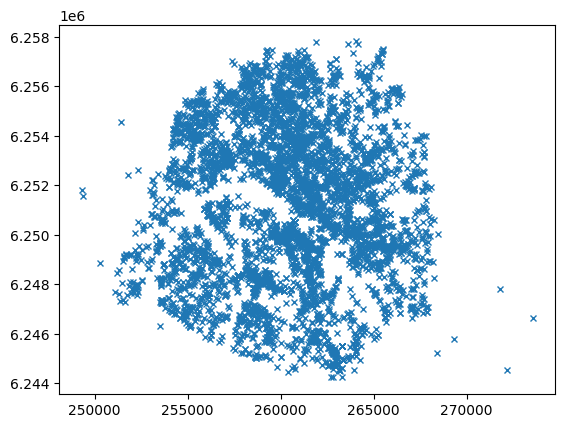

In [ ]:
# Read the restaurants csv file
import pandas as pd
import matplotlib.pyplot as plt

restaurants = pd.read_csv ('paris_restaurants.csv')

# Inspect the first rows of restaurants
restaurants.head()

# Make a plot of all points
fig, ax = plt.subplots()
ax.plot(restaurants['x'],restaurants['y'], 'x', markersize=4)

#plt.show()

1. Import pandas as pd and matplotlib.pyplot as plt.
2. Read the restaurants dataset ("paris_restaurants.csv") and assign it to a variable called restaurants.
3. Inspect the first 5 rows of the df dataframe with the head() method. Do you see the columns with coordinates?
4. Make a quick visualization of the locations of the districts using the matplotlib plot() method.



---
**Adding a background map**


In [ ]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 53.7 MB/s eta 0:00:00


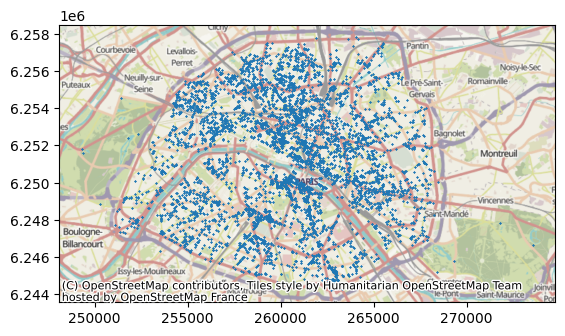

In [ ]:
# Read the restaurants csv file
import pandas as pd
import matplotlib.pyplot as plt
restaurants = pd.read_csv ('paris_restaurants.csv')
# Import contextily
import contextily
# A figure of all restaurants with background
fig, ax = plt.subplots()
ax.plot(restaurants['x'],restaurants['y'], 'x', markersize=1)
contextily.add_basemap(ax)
plt.show()

1. Import contextily.
2. Re-do the figure of the previous exercise: make a plot of all the points in restaurant.
3. Set the marker size equal to 1 to reduce the size of the points.
4. Use the add_basemap() function of contextily to add a background map: the first argument is the matplotlib axes object ax.



---
**Explore the Paris district**


In [ ]:
!pip install geopandas

<bound method NDFrame.head of     id           district_name  population  \
0    1  St-Germain-l'Auxerrois        1672   
1    2                  Halles        8984   
2    3            Palais-Royal        3195   
3    4           Place-Vendôme        3044   
4    5                 Gaillon        1345   
..  ..                     ...         ...   
75  76                  Combat       38988   
76  77              Belleville       35773   
77  78           Saint-Fargeau       42087   
78  79           Père-Lachaise       42332   
79  80                Charonne       62901   

                                             geometry  
0   POLYGON ((451922.133 5411438.484, 451922.080 5...  
1   POLYGON ((452278.419 5412160.893, 452192.407 5...  
2   POLYGON ((451553.806 5412340.522, 451528.058 5...  
3   POLYGON ((451004.908 5412654.095, 450960.640 5...  
4   POLYGON ((451328.752 5412991.278, 451294.721 5...  
..                                                ...  
75  POLYGON ((455155.128 

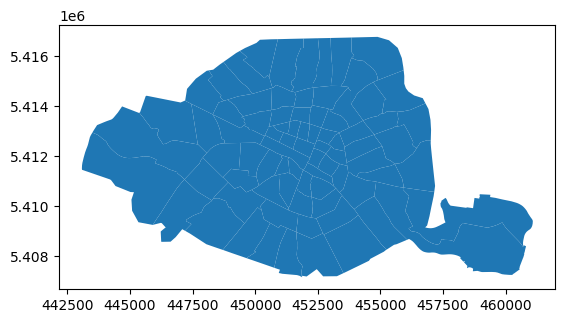

In [ ]:
# Import GeoPandas
import geopandas as gp
import matplotlib.pyplot as plt
# Read the Paris districts dataset
districts = gp.read_file('paris_districts_utm.geojson')

# Inspect the first rows
print(districts.head)

# Make a quick visualization of the districts
districts.plot()
plt.show()

1. Import GeoPandas.
2. Read the districts file ('paris_districts.gpkg') and assign it to a variable called districts.
3. Print the first 5 rows of the districts dataset. What kind of geometries do those datasets contain?
4. Make a quick visualization of districts.

In [ ]:
# Check what kind of object districts is
print(type(districts))

# Check the type of the geometry attribute
print(type(districts.geometry))

# Inspect the first rows of the geometry
print(districts.geometry.head)

# Inspect the area of the districts
print(districts.geometry.area)

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<bound method NDFrame.head of 0     POLYGON ((451922.133 5411438.484, 451922.080 5...
1     POLYGON ((452278.419 5412160.893, 452192.407 5...
2     POLYGON ((451553.806 5412340.522, 451528.058 5...
3     POLYGON ((451004.908 5412654.095, 450960.640 5...
4     POLYGON ((451328.752 5412991.278, 451294.721 5...
                            ...                        
75    POLYGON ((455155.128 5414359.413, 455239.337 5...
76    POLYGON ((454767.853 5412865.188, 454761.185 5...
77    POLYGON ((457014.145 5413260.154, 457015.161 5...
78    POLYGON ((455648.392 5411702.054, 455580.676 5...
79    POLYGON ((457155.511 5410584.127, 457153.394 5...
Name: geometry, Length: 80, dtype: geometry>
0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dt

1. Check what kind of object districts is with the type() function.
2. Access the geometry attribute of the districts GeoDataFrame and print the type of this object.
3. Show the first 5 rows of the geometry.
4. Inspect the area of the districts's geometries.



---
**The Paris restaurants as GeoDataFrame**


                                 type              x             y  \
0                 European restuarant  259641.691646  6.251867e+06   
1       Traditional French restaurant  259572.339603  6.252030e+06   
2       Traditional French restaurant  259657.276374  6.252143e+06   
3  Indian / Middle Eastern restaurant  259684.438330  6.252203e+06   
4       Traditional French restaurant  259597.943086  6.252230e+06   

                         geometry  
0  POINT (259641.692 6251867.063)  
1  POINT (259572.340 6252029.683)  
2  POINT (259657.276 6252143.401)  
3  POINT (259684.438 6252203.137)  
4  POINT (259597.943 6252230.044)  


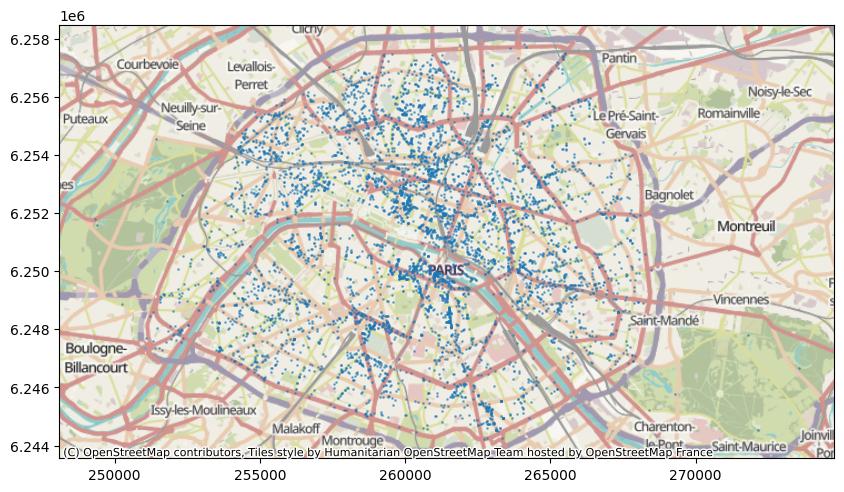

In [ ]:
# Read the restaurants csv file into a DataFrame
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("paris_restaurants.csv")

# Convert it to a GeoDataFrame
restaurants = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.x, df.y))

# Inspect the first rows of the restaurants GeoDataFrame
print(restaurants.head())

# Make a plot of the restaurants
ax = restaurants.plot(figsize=(10,10), alpha=0.5, markersize=1)
import contextily
contextily.add_basemap(ax)
plt.show()

1.Inspect the first rows of the restaurants GeoDataFrame.
2. Plot it with the plot() method of the GeoDataFrame. The return value is a matplotlib axes object: call this ax.
3. Again, make sure to set the marker size equal to 1.
4. Add a basemap layer using contextily.

---
**Visualizing the population density**


   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...  
3  POLYGON ((451004.908 5412654.095, 450960.640 5...  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...  
0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64


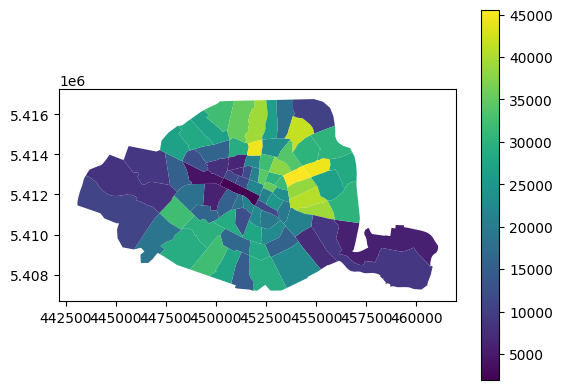

In [ ]:
import matplotlib.pyplot as plt
# Inspect the first rows of the districts dataset
print(districts.head())

# Inspect the area of the districts
print(districts.geometry.area)

# Add a population density column
districts['population_density'] = districts['population'] / districts.geometry.area * 10**6

# Make a plot of the districts colored by the population density
districts.plot(column='population_density', legend=True)
plt.show()

1. Print the first rows of the districts dataset. Do you see the 'population' column?
2. Inspect the area of the districts's geometries.
3. Add a column 'population_density' representing the number of inhabitants per squared kilometer (Note: The area is given in squared meter, so you will need to multiply the result with 10**6).
4. Plot the districts using the 'population_density' to color the polygons.

---
**Using pandas functionalities: groupby**


In [ ]:
 import pandas as pd
# Load the restaurants data
restaurants = pd.read_csv('paris_restaurants.csv')

# Calculate the number of restaurants of each type
type_counts = restaurants.groupby('type').size()

# Print the result
print(type_counts)

type
African restaurant                        138
Asian restaurant                         1642
Caribbean restaurant                       27
Central and South American restuarant      97
European restuarant                      1178
Indian / Middle Eastern restaurant        394
Maghrebian restaurant                     207
Other world restaurant                    107
Traditional French restaurant            1945
dtype: int64


1. Using groupby(), group the restaurants by the type of restaurants, and calculate the size of each group. Call the result type_counts.
2. Print the resulting Series.

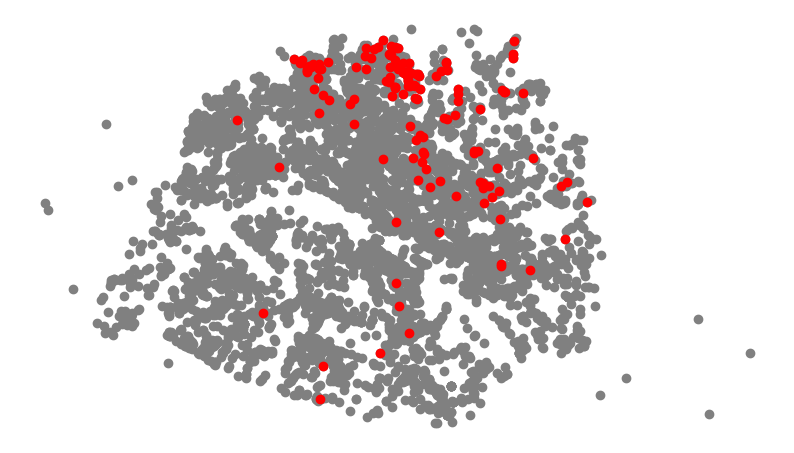

In [ ]:
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
df = pd.read_csv("paris_restaurants.csv")
# Load the restaurants dataset
restaurants = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.x, df.y))

# Take a subset of the African restaurants
african_restaurants = restaurants[restaurants['type']=='African restaurant']

# Make a multi-layered plot
fig, ax = plt.subplots(figsize=(10, 10))
restaurants.plot(ax=ax, color='grey')
african_restaurants.plot(ax=ax, color='red')
# Remove the box, ticks and labels
ax.set_axis_off()
plt.show()

1. Select a subset of all rows where the type is 'African restaurant'. Call this subset african_restaurants.
2. Make a plot of all restaurants and use a uniform grey color. Remember to pass a matplotlib axes object to the plot() method.
3. Add a second layer of only the African restaurants in red. For the typical colors, you can use English names such as 'red' and 'grey'.
4. Remove the box using the set_axis_off() method on the matplotlib axes object.

---
**Shapely geometries and spatial relationships**


In [ ]:
!pip install shapely

In [ ]:
# Import the Point geometry
import shapely
from shapely.geometry import Point

# Construct a point object for the Eiffel Tower
eiffel_tower = Point(255422.6, 6250868.9)

# Print the result
print(eiffel_tower)

POINT (255422.6 6250868.9)


1. Import the Point class from shapely.
2. Create a shapely point object with the coordinates of the Eiffel Tower and assign it to a variable called eiffel_tower.
3. Print the result.

---
**Shapely spatial method**


In [ ]:
# Construct a point object for the Eiffel Tower
eiffel_tower = Point(255422.6, 6250868.9)

# Accessing the Montparnasse geometry (Polygon) and restaurant
district_montparnasse = districts.loc[52, 'geometry']
resto = restaurants.loc[956, 'geometry']

# Is the Eiffel Tower located within the Montparnasse district?
print(eiffel_tower.within(district_montparnasse))

# Does the Montparnasse district contains the restaurant?
print(district_montparnasse.contains(resto))

# The distance between the Eiffel Tower and the restaurant?
print(district_montparnasse.contains(resto))

False
False
False


1. Check if the Eiffel Tower is located within the Montparnasse district.
2. Check if the Montparnasse district contains the restaurant location.
3. Calculate the distance between the Eiffel Tower and the restaurant (note: in this case, the distance is returned in meters).


---



In [ ]:
# Construct a point object for the Eiffel Tower
eiffel_tower = Point(255422.6, 6250868.9)

# Create a boolean Series
mask = districts['geometry'].contains(eiffel_tower)

# Print the boolean Series
print(mask.head())

# Filter the districts with the boolean mask
filtered_districts = districts[mask]
print(filtered_districts)

0    False
1    False
2    False
3    False
4    False
dtype: bool
Empty GeoDataFrame
Columns: [id, district_name, population, geometry, population_density]
Index: []


---
1. Create a boolean mask (or filter) indicating whether each district contains the Eiffel Tower or not. Call the result mask.
2. Filter the districts dataframe with the boolean mask and print the result.


**Spatial join**

In [ ]:
import geopandas
districts = geopandas.read_file('paris_districts_utm.geojson')
stations = geopandas.read_file('paris_sharing_bike_stations_utm.geojson')
# Join the districts and stations datasets
joined = geopandas.sjoin(districts, stations)

# Inspect the first five rows of the result
print(joined.head)

<bound method NDFrame.head of     id           district_name  population  \
0    1  St-Germain-l'Auxerrois        1672   
0    1  St-Germain-l'Auxerrois        1672   
0    1  St-Germain-l'Auxerrois        1672   
0    1  St-Germain-l'Auxerrois        1672   
1    2                  Halles        8984   
..  ..                     ...         ...   
79  80                Charonne       62901   
79  80                Charonne       62901   
79  80                Charonne       62901   
79  80                Charonne       62901   
79  80                Charonne       62901   

                                             geometry  index_right  \
0   POLYGON ((451922.133 5411438.484, 451922.080 5...         1020   
0   POLYGON ((451922.133 5411438.484, 451922.080 5...          220   
0   POLYGON ((451922.133 5411438.484, 451922.080 5...         1011   
0   POLYGON ((451922.133 5411438.484, 451922.080 5...         1034   
1   POLYGON ((452278.419 5412160.893, 452192.407 5...          780 

1. Use the geopandas.sjoin() function to add the district name in which each station is located to the stations dataset. Call the result joined.
2. Check the result by showing the first five rows.

In [ ]:
import pandas as pd
import geopandas
# Read the trees and districts data
trees = geopandas.read_file('paris_trees_small.gpkg')
districts = geopandas.read_file('paris_districts_utm.geojson')
trees_by_district = geopandas.sjoin(trees, districts)

# The trees dataset with point locations of trees
print(trees.head())

# Print the first rows of the result of the previous exercise
print(trees_by_district.head())

# Merge the 'districts' and 'trees_by_district' dataframes
districts_trees = pd.merge(districts, trees)

# Inspect the result
print(districts_trees.head())

      species location_type                        geometry
0  Marronnier    Alignement  POINT (455834.122 5410780.606)
1  Marronnier    Alignement  POINT (446546.284 5412574.697)
2  Marronnier    Alignement  POINT (449768.283 5409876.557)
3  Marronnier    Alignement  POINT (451779.708 5409292.071)
4     Sophora    Alignement  POINT (447041.361 5409756.712)
         species location_type                        geometry  index_right  \
0     Marronnier    Alignement  POINT (455834.122 5410780.606)           43   
130  Micocoulier    Alignement  POINT (455458.848 5411310.443)           43   
142      Platane    Alignement  POINT (455704.681 5410991.067)           43   
402      Cedrele    Alignement  POINT (455538.223 5411112.314)           43   
428  Micocoulier    Alignement  POINT (455487.563 5411285.863)           43   

     id      district_name  population  
0    44  Sainte-Marguerite       36476  
130  44  Sainte-Marguerite       36476  
142  44  Sainte-Marguerite       36476  
4

**Geographic vs projected coordinates**

In [ ]:
# Import the districts dataset
districts = geopandas.read_file("paris_districts_utm.geojson")

# Print the CRS information
print(districts.crs)

# Print the first rows of the GeoDataFrame
print(districts.head())

EPSG:32631
   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...  
3  POLYGON ((451004.908 5412654.095, 450960.640 5...  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...  


**Case study**

   visit_date                                name  n_workers mineral  \
0  2013-03-27                           Mayi-Tatu      150.0    Gold   
1  2013-03-27                             Mabanga      115.0    Gold   
2  2013-03-27                             Molende      130.0    Gold   
3  2013-03-27                          Embouchure      135.0    Gold   
4  2013-03-27  Apumu-Atandele-Jerusalem-Luka Yayo      270.0    Gold   

                   geometry  
0  POINT (29.66033 1.01089)  
1  POINT (29.65862 1.00308)  
2  POINT (29.65629 0.98563)  
3  POINT (29.64494 0.99976)  
4  POINT (29.66000 0.95600)  
EPSG:4326


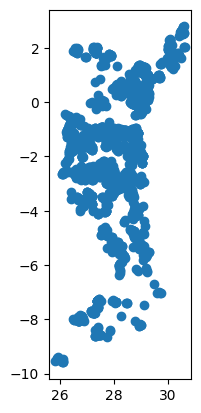

In [ ]:
# Import GeoPandas and Matplotlib
import geopandas
import matplotlib.pyplot as plt

# Read the mining site data
mining_sites = geopandas.read_file("ipis_cod_mines.geojson")

# Print the first rows and the CRS information
print(mining_sites.head())
print(mining_sites.crs)

# Make a quick visualisation
mining_sites.plot()
plt.show()

        WDPAID   WDPA_PID PA_DEF                              NAME  \
0  555555524.0  555555524      1  Lyondji Bonobo Community Reserve   
1     478291.0     478291      1         Parc national des Virunga   
2      72340.0      72340      1            Luo Scientific Reserve   
3     478292.0     478292      1                           Salonga   
4       9143.0       9143      1        Réserve forestière de Luki   

                                       ORIG_NAME  \
0  Réserve Communautaires des Bonobos d' Iyondji   
1                      Parc national des Virunga   
2                 Réserve Scientifique de la Luo   
3                    Parc National de la Salonga   
4                     Réserve forestière de Luki   

                                              DESIG  \
0            Forêt Classée et Réserve Communautaire   
1  Ramsar Site, Wetland of International Importance   
2                                           Réserve   
3                       Réserve Naturelle Inte

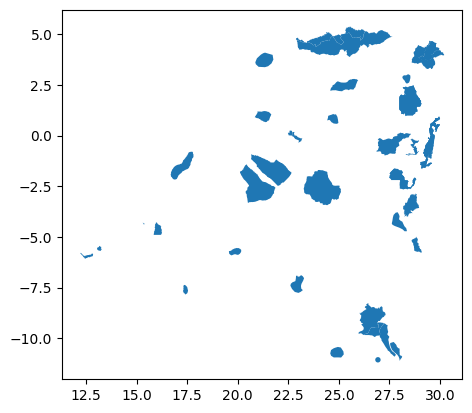

In [ ]:
# Import GeoPandas and Matplotlib
import geopandas
import matplotlib.pyplot as plt

# Read the mining site data
national_parks = geopandas.read_file("congo_np.geojson")

# Print the first rows and the CRS information
print(national_parks.head())
print(national_parks.crs)

# Make a quick visualisation
national_parks.plot()
plt.show()

1. Read and explore the mining site data ("ipis_cod_mines.geojson"), assigning it to a variable called mining_sites.
2. Adapt your code to do the same for the national park data ("congo_np.gpkg", assign to a variable national_parks).

**CRS transformation**

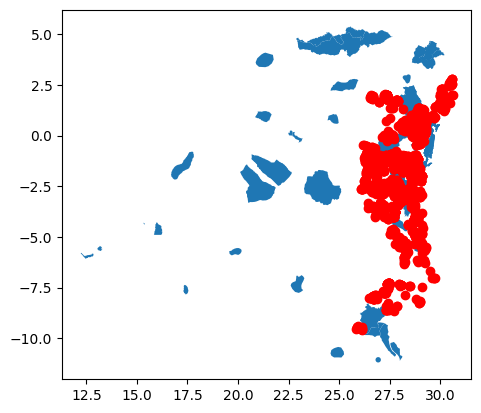

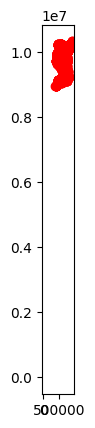

In [ ]:
# Plot the natural parks and mining site data
ax = national_parks.plot()
mining_sites.plot(ax=ax, color='red')
plt.show()

# Convert both datasets to UTM projection
mining_sites_utm = mining_sites.to_crs('epsg:32735')
national_parks_utm = national_parks.to_crs('epsg:4326')

# Plot the converted data again
ax = national_parks_utm.plot()
mining_sites_utm.plot(ax=ax, color='red')
plt.show()

**Styling**

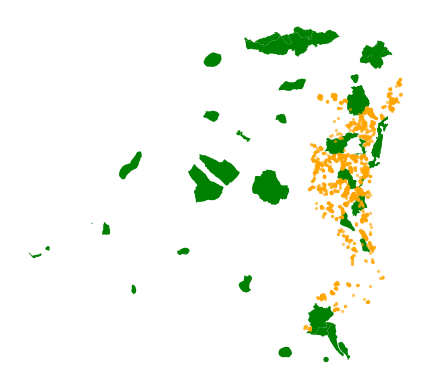

In [ ]:
# Plot of the parks and mining sites
ax = national_parks.plot(color='green')
mining_sites.plot(ax=ax, markersize=2, alpha = 0.5, color = 'orange')
ax.set_axis_off()
plt.show()

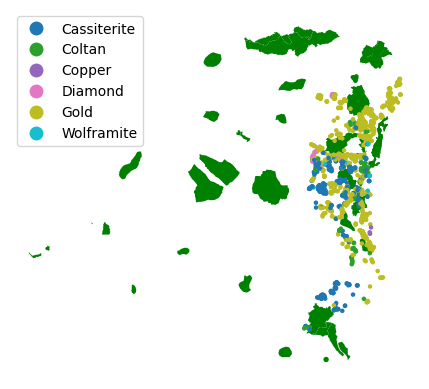

In [ ]:
ax = national_parks.plot(color='green')
mining_sites.plot(ax=ax, column = 'mineral', markersize=5, legend=True)
ax.set_axis_off()
plt.show()

**Buffer around point**

In [ ]:
from shapely.geometry import Point
# goma is a Point
goma = Point(29.22, 1.66)
print(type(goma))

# Create a buffer of 50km around Goma
goma_buffer = goma.buffer(50000)

# The buffer is a polygon
print(type(goma_buffer))

# Check how many sites are located within the buffer
mask = mining_sites.within(goma_buffer)
print (mask.sum())

# Calculate the area of national park within the buffer
print(national_parks.intersection(goma_buffer).area / (1000**2))

<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.polygon.Polygon'>
2143
0     8.367841e-08
1     6.313227e-07
2     3.900858e-08
3     2.712841e-06
4     2.538453e-08
5     5.688811e-08
6     1.759922e-08
7     1.550150e-07
8     2.720684e-07
9     5.471916e-07
10    4.030727e-07
11    1.105261e-06
12    8.910605e-07
13    6.634643e-07
14    8.143298e-08
15    3.546399e-07
16    1.768691e-07
17    2.672191e-06
18    5.063428e-07
19    1.132957e-06
20    4.677260e-07
21    8.027364e-07
22    1.225257e-07
23    7.309237e-08
24    2.815122e-07
25    2.806340e-09
26    7.884484e-08
27    2.014497e-06
28    3.363743e-07
29    3.183708e-07
30    5.518693e-08
31    2.530203e-08
32    1.812740e-07
33    2.948019e-07
34    5.336169e-07
35    6.064913e-07
36    5.407319e-08
37    6.358927e-07
38    1.879153e-07
39    4.909993e-07
40    4.176934e-07
41    5.338968e-07
42    1.132957e-06
43    2.852437e-06
44    6.313226e-07
dtype: float64


<ipython-input-84-72baec93862f>:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(national_parks.intersection(goma_buffer).area / (1000**2))




1.   Goma City located at 1.66°S 29.22°E
2.   Create a buffer of 50 km around goma, and assign it to a variable goma_buffer.
3. Check which of the points of mining_sites are located within this buffer (and call this mask). Count those sites by taking the sum of the boolean mask, and print this result.
4. Calculate the intersections of the national parks with the buffer. Take the sum of the area of those intersections, and print the result in km².



**Mining sites around national parks**

In [ ]:
# Extract the single polygon for the Kahuzi-Biega National park
kahuzi = national_parks[national_parks['NAME'] == "Kahuzi-Biega National park"].geometry.squeeze()

# Take a subset of the mining sites located within Kahuzi
sites_kahuzi = mining_sites[mining_sites.within(kahuzi)]
print(sites_kahuzi)

# Determine in which national park a mining site is located
sites_within_park = geopandas.sjoin(mining_sites, national_parks, how='inner')
print(sites_within_park.head())

# The number of mining sites in each national park
print(sites_within_park['name'].value_counts())

Empty GeoDataFrame
Columns: [visit_date, name, n_workers, mineral, geometry]
Index: []
     visit_date          name  n_workers mineral                   geometry  \
253  2013-09-05  Kiviri/Tayna      244.0    Gold  POINT (28.88453 -0.35253)   
578  2015-09-02   Lubondozi 3       30.0    Gold  POINT (27.70685 -4.02155)   
579  2015-09-02        Katamu      180.0    Gold  POINT (27.68691 -4.03191)   
580  2015-09-02     Kimabwe 1      120.0    Gold  POINT (27.68848 -4.01367)   
581  2015-09-02   Lubondozi 1      300.0    Gold  POINT (27.71317 -4.02818)   

     index_right       WDPAID   WDPA_PID PA_DEF        NAME  ... STATUS_YR  \
253           23     317056.0     317056      1       Tayna  ...         0   
578           29  555512066.0  555512066      1  Luama-Kivu  ...         0   
579           29  555512066.0  555512066      1  Luama-Kivu  ...         0   
580           29  555512066.0  555512066      1  Luama-Kivu  ...         0   
581           29  555512066.0  555512066      1 

/usr/local/lib/python3.10/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


1. Use the within() method to subset the mining sites (mining_sites) located in the kahuzi national park. Call the result sites_kahuzi.
2. Determine for each of the mining sites if and in which national park it is located. This will create a GeoDataFrame similar to mining_sites but with an additional column with national park name. Call this result sites_within_park.
3. Count the number of sites in each park by using the value_counts() method on the 'Name' column of sites_within_park.



---

